In [263]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys

09/18/2018  11:59 AM    <DIR>          .
09/18/2018  11:59 AM    <DIR>          ..
09/15/2018  04:24 PM                39 .gitignore
09/18/2018  11:59 AM    <DIR>          .ipynb_checkpoints
09/18/2018  11:31 AM    <DIR>          data
09/15/2018  11:18 PM            71,720 FOREX Attempt1.ipynb
09/18/2018  11:59 AM           551,502 Moving Average Optimum Portfolio.ipynb
09/15/2018  04:24 PM                10 README.md
               4 File(s)        623,271 bytes
               4 Dir(s)  17,059,385,344 bytes free


In [264]:
!dir data

 Volume in drive C is Windows
 Volume Serial Number is 7A67-75B7

 Directory of C:\Users\User\Desktop\Haaris\Trade Journal\Research\fxboys\data

09/18/2018  11:31 AM    <DIR>          .
09/18/2018  11:31 AM    <DIR>          ..
09/18/2018  11:31 AM           279,521 DEXALUS.csv
09/15/2018  04:27 PM           116,197 DEXBZUS.csv
09/15/2018  04:27 PM           233,952 DEXCAUS.csv
09/15/2018  04:27 PM           184,596 DEXCHUS.csv
09/15/2018  04:27 PM           234,285 DEXDNUS.csv
09/15/2018  04:27 PM           184,896 DEXHKUS.csv
09/15/2018  04:27 PM           232,957 DEXINUS.csv
09/15/2018  04:27 PM           232,378 DEXJPUS.csv
09/15/2018  04:27 PM           187,964 DEXKOUS.csv
09/15/2018  04:27 PM           233,812 DEXMAUS.csv
09/15/2018  04:27 PM           125,895 DEXMXUS.csv
09/15/2018  04:27 PM           233,917 DEXNOUS.csv
09/18/2018  11:30 AM           279,258 DEXNZUS.csv
09/15/2018  04:27 PM           234,242 DEXSDUS.csv
09/15/2018  04:27 PM           193,276 DEXSFUS.csv
09/15/2

In [265]:
baseDir = 'data/'

In [266]:
%matplotlib inline

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [268]:
def readDEX(filepath):
    rawData = pd.read_csv(filepath).replace('.', np.nan).fillna(method='ffill')
    # TODO : Parse dates
    rawData.VALUE = rawData.VALUE.astype(float)
    return rawData

In [269]:
# Read csv, remove invalid data
eurusd = readDEX(baseDir + 'DEXUSEU.csv')
gbpusd = readDEX(baseDir + 'DEXUSUK.csv')
usdgbp = readDEX(baseDir + 'DEXUKUS.csv')
usdjpy = readDEX(baseDir + 'DEXJPUS.csv')
usdchf = readDEX(baseDir + 'DEXSZUS.csv')
usdcad = readDEX(baseDir + 'DEXCAUS.csv')
audusd = readDEX(baseDir + 'DEXUSAL.csv')
usdaud = readDEX(baseDir + 'DEXALUS.csv')
nzdusd = readDEX(baseDir + 'DEXUSNZ.csv')
usdnzd = readDEX(baseDir + 'DEXNZUS.csv')
usdsek = readDEX(baseDir + 'DEXSDUS.csv')
usdnok = readDEX(baseDir + 'DEXNOUS.csv')

In [270]:
def MAstrat(myVar,ShortMA,LongMA):
    XR = readDEX(baseDir + myVar + '.csv')
    XR['ShortMA'] = XR.VALUE.rolling(window=ShortMA).mean()
    XR['LongMA'] = XR.VALUE.rolling(window=LongMA).mean()
    
    XR['Differential'] = XR['ShortMA'] - XR['LongMA']
    
    X = 0
    XR['Stance'] = np.where(XR['Differential'] > X, 1, 0)
    XR['Stance'] = np.where(XR['Differential'] < X, -1, XR['Stance'])
    XR['Stance'].value_counts()
    
    XR['Returns'] = XR.VALUE.pct_change()[1:] * 100
    XR['Strategy'] = XR['Returns'] * XR['Stance'].shift(1)
    
    XR['StrategyPerformance'] = XR['Strategy'].cumsum() + 100
    XR['StrategyPerformance%'] = (((XR['StrategyPerformance'][12434]) / (XR['StrategyPerformance'][1])) - 1) * 100
    
    XRdf = pd.DataFrame(XR['StrategyPerformance%'], index=[ShortMA], columns=[LongMA])
    
    return (XR['Strategy'].cumsum()[12434])
    # return (((XR['StrategyPerformance'][12434]) / (XR['StrategyPerformance'][1])) - 1) * 100

In [271]:
ShortMA = np.linspace(10,100,19,dtype=int)
LongMA = np.linspace(110,200,19,dtype=int)

results_pnl = np.zeros((len(ShortMA),len(LongMA)))

# USD/GBP Analysis

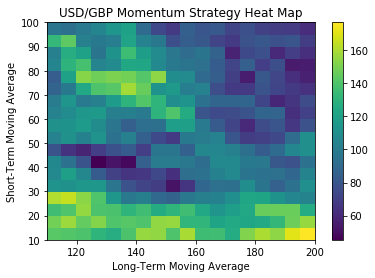

110    161.527245
115    165.394926
120    155.754436
125    152.537545
130    151.191741
135    158.774117
140    156.414886
145    155.293434
150    156.253854
155    159.975883
160    135.935201
165    136.477430
170    126.157566
175    152.019427
180    160.166786
185    154.481510
190    171.172161
195    177.038859
200    171.046207
dtype: float64
10     177.038859
15     157.278532
20     155.754436
25     165.394926
30     115.766312
35     118.985181
40     107.517671
45     111.052344
50     112.720152
55     119.281275
60     140.943960
65     141.046833
70     158.774117
75     154.724717
80     138.287460
85     135.755321
90     144.398158
95     120.409342
100    108.151936
dtype: float64


In [217]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXUKUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/GBP Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

10/195 Strategy

count    12434.000000
mean         0.014238
std          0.586635
min         -4.484849
25%         -0.260061
50%          0.000000
75%          0.294686
max          8.512354
Name: Strategy, dtype: float64

Skew: 0.262
Kurtosis: 8.2796
Total Return = 177.04%
Annualized Return = 3.04%
Sharpe Ratio = 2.4299999999999997%


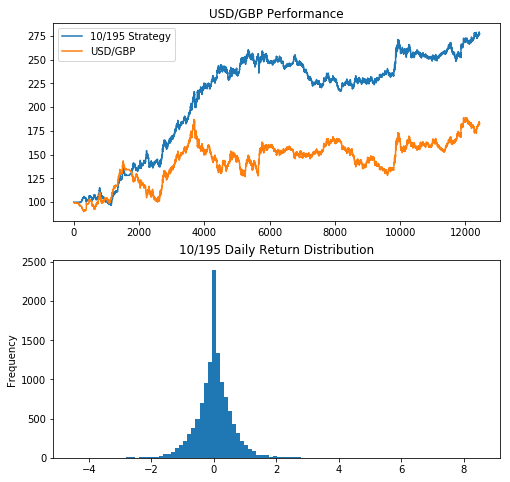

In [291]:
############################################################## 10/195 ##########################################################
usdgbp['ShortMA'] = usdgbp.VALUE.rolling(10).mean()
usdgbp['LongMA'] = usdgbp.VALUE.rolling(195).mean()

usdgbp['Differential'] = usdgbp['ShortMA'] - usdgbp['LongMA']

X = 0
usdgbp['Stance'] = np.where(usdgbp['Differential'] > X, 1, 0)
usdgbp['Stance'] = np.where(usdgbp['Differential'] < X, -1, usdgbp['Stance'])
usdgbp['Stance'].value_counts()

usdgbp['Returns'] = usdgbp.VALUE.pct_change()[1:] * 100
usdgbp['Strategy'] = usdgbp['Returns'] * usdgbp['Stance'].shift(1)

usdgbp['StrategyPerformance'] = usdgbp['Strategy'].cumsum() + 100

## Performance
print("10/195 Strategy" "\n")
plt.subplot(2,1,1)
print(usdgbp['Strategy'].describe());
usdgbp['StrategyPerformance'].plot(figsize = (8,8), label='10/195 Strategy');
plt.plot(usdgbp['Returns'].cumsum() + 100, label='USD/GBP');
plt.legend()
plt.title("USD/GBP Performance");

## Distributions
plt.subplot(2,1,2)
usdgbp['Strategy'].plot(kind='hist', figsize=(8,8), title='10/195 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdgbp['Strategy'].skew(),4));
print("Kurtosis:",round(usdgbp['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdgbp['StrategyPerformance'][12434]) / usdgbp['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdgbp['StrategyPerformance'][12434]) / usdgbp['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdgbp['Strategy'].mean()/usdgbp['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/JPY Analysis

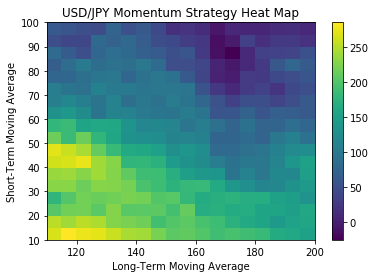

110    272.043704
115    285.726488
120    276.639227
125    272.549008
130    259.688520
135    245.561052
140    243.164814
145    221.362056
150    206.930233
155    211.969085
160    201.792858
165    189.967552
170    195.790428
175    190.004496
180    184.134905
185    165.230705
190    161.812714
195    160.245310
200    179.951174
dtype: float64
10     285.726488
15     253.871983
20     228.325913
25     223.193480
30     230.118037
35     241.187353
40     275.131564
45     272.043704
50     215.868494
55     185.364591
60     140.703385
65     119.819238
70     110.806416
75      98.463099
80     101.442351
85      85.420457
90      79.254365
95      73.216324
100     76.361059
dtype: float64


In [187]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXJPUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/JPY Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

10/115 Strategy

count    12434.000000
mean         0.022979
std          0.631865
min         -4.422076
25%         -0.253204
50%          0.000000
75%          0.311697
max          9.067039
Name: Strategy, dtype: float64

Skew: 0.402
Kurtosis: 9.1229
Total Return = 285.73%
Annualized Return = 4.04%
Sharpe Ratio = 3.64%


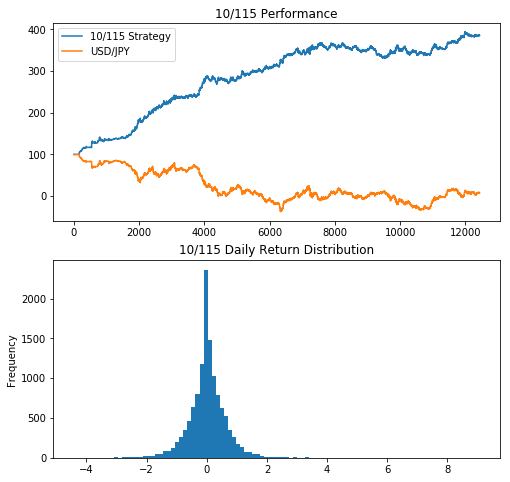

In [292]:
############################################################## 10/115 ##########################################################
usdjpy['ShortMA'] = usdjpy.VALUE.rolling(10).mean()
usdjpy['LongMA'] = usdjpy.VALUE.rolling(115).mean()

usdjpy['Differential'] = usdjpy['ShortMA'] - usdjpy['LongMA']

X = 0
usdjpy['Stance'] = np.where(usdjpy['Differential'] > X, 1, 0)
usdjpy['Stance'] = np.where(usdjpy['Differential'] < X, -1, usdjpy['Stance'])
usdjpy['Stance'].value_counts()

usdjpy['Returns'] = usdjpy.VALUE.pct_change()[1:] * 100
usdjpy['Strategy'] = usdjpy['Returns'] * usdjpy['Stance'].shift(1)

usdjpy['StrategyPerformance'] = usdjpy['Strategy'].cumsum() + 100

## Performance
print("10/115 Strategy" "\n")
print(usdjpy['Strategy'].describe());
plt.subplot(2,1,1)
usdjpy['StrategyPerformance'].plot(figsize = (8,8), label='10/115 Strategy');
plt.plot(usdjpy['Returns'].cumsum() + 100, label='USD/JPY');
plt.legend();
plt.title("10/115 Performance");

## Distributions
plt.subplot(2,1,2)
usdjpy['Strategy'].plot(kind='hist', figsize=(8,8), title='10/115 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdjpy['Strategy'].skew(),4));
print("Kurtosis:",round(usdjpy['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdjpy['StrategyPerformance'][12434]) / usdjpy['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdjpy['StrategyPerformance'][12434]) / usdjpy['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdjpy['Strategy'].mean()/usdjpy['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/CHF Analysis

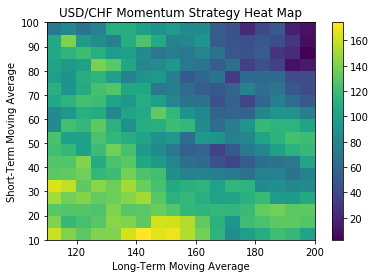

110    165.246508
115    157.484166
120    142.286009
125    143.799897
130    144.034403
135    162.847944
140    174.225476
145    166.252067
150    169.052368
155    154.106111
160    137.479606
165    117.121141
170    115.699313
175    121.763851
180    132.850895
185    136.984267
190    131.628623
195    131.343983
200    132.055392
dtype: float64
10     174.225476
15     162.509391
20     141.853460
25     151.174986
30     165.246508
35     137.390693
40     142.286009
45     136.804158
50     124.696860
55     131.799294
60     132.429173
65     123.253428
70     127.346156
75     113.309151
80     139.450672
85     120.608164
90     140.691155
95     110.408292
100    101.915493
dtype: float64


In [189]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXSZUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/CHF Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

10/140 Strategy

count    12434.000000
mean         0.014012
std          0.707298
min        -12.209988
25%         -0.313800
50%          0.000000
75%          0.373394
max          4.312553
Name: Strategy, dtype: float64

Skew: -0.8791
Kurtosis: 13.2415
Total Return = 174.23%
Annualized Return = 3.01%
Sharpe Ratio = 1.9800000000000002%


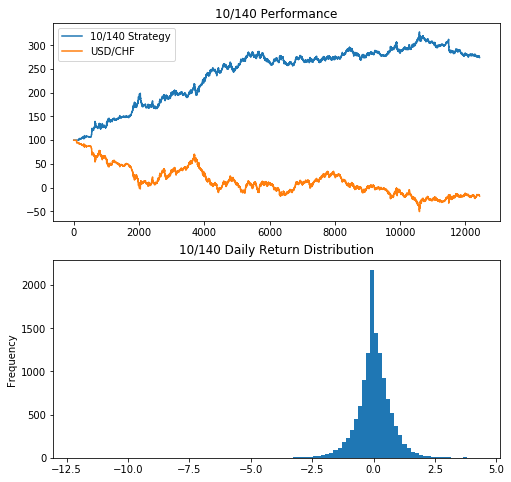

In [293]:
############################################################## 10/140 ##########################################################
usdchf['ShortMA'] = usdchf.VALUE.rolling(10).mean()
usdchf['LongMA'] = usdchf.VALUE.rolling(140).mean()

usdchf['Differential'] = usdchf['ShortMA'] - usdchf['LongMA']

X = 0
usdchf['Stance'] = np.where(usdchf['Differential'] > X, 1, 0)
usdchf['Stance'] = np.where(usdchf['Differential'] < X, -1, usdchf['Stance'])
usdchf['Stance'].value_counts()

usdchf['Returns'] = usdchf.VALUE.pct_change()[1:] * 100
usdchf['Strategy'] = usdchf['Returns'] * usdchf['Stance'].shift(1)

usdchf['StrategyPerformance'] = usdchf['Strategy'].cumsum() + 100

## Performance
print("10/140 Strategy" "\n")
print(usdchf['Strategy'].describe());
plt.subplot(2,1,1)
usdchf['StrategyPerformance'].plot(figsize = (8,8), label='10/140 Strategy');
plt.plot(usdchf['Returns'].cumsum() + 100, label='USD/CHF')
plt.legend();
plt.title("10/140 Performance");

## Distributions
plt.subplot(2,1,2)
usdchf['Strategy'].plot(kind='hist', figsize=(8,8), title='10/140 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdchf['Strategy'].skew(),4));
print("Kurtosis:",round(usdchf['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdchf['StrategyPerformance'][12434]) / usdchf['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdchf['StrategyPerformance'][12434]) / usdchf['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdchf['Strategy'].mean()/usdchf['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")


# USD/CAD Analysis

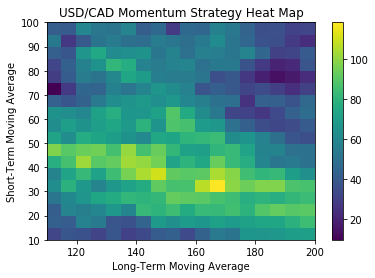

110     97.719675
115     89.890464
120    102.557884
125     94.953282
130     92.280392
135    102.982660
140    104.849097
145    110.562684
150     92.648385
155     91.160049
160    106.910410
165    118.352130
170     99.590970
175     93.765419
180     97.561191
185     97.911822
190     89.808094
195     90.535822
200     91.539055
dtype: float64
10      70.654635
15      84.188805
20      92.122436
25      92.648385
30     118.352130
35     110.562684
40     102.982660
45     101.323814
50      83.662890
55      88.049741
60      88.915375
65      68.384462
70      66.129749
75      73.942246
80      81.265528
85      74.639566
90      61.595359
95      59.376385
100     72.378849
dtype: float64


In [191]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXCAUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/CAD Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

30/165 Strategy

count    12434.000000
mean         0.009518
std          0.401546
min         -4.945140
25%         -0.153146
50%          0.000000
75%          0.173558
max          3.880356
Name: Strategy, dtype: float64

Skew: -0.1835
Kurtosis: 10.7865
Total Return = 118.35%
Annualized Return = 2.32%
Sharpe Ratio = 2.37%


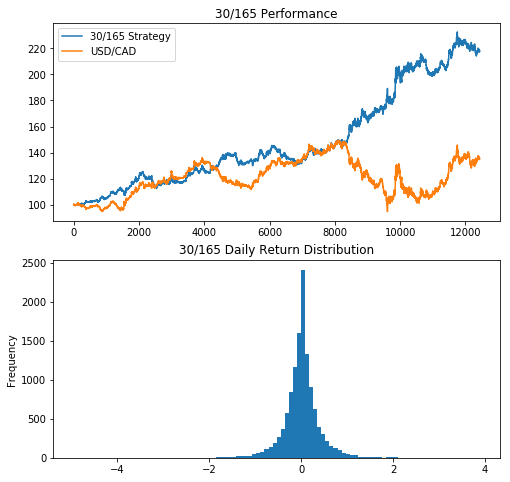

In [294]:
############################################################## 30/165 ##########################################################
usdcad['ShortMA'] = usdcad.VALUE.rolling(30).mean()
usdcad['LongMA'] = usdcad.VALUE.rolling(165).mean()

usdcad['Differential'] = usdcad['ShortMA'] - usdcad['LongMA']

X = 0
usdcad['Stance'] = np.where(usdcad['Differential'] > X, 1, 0)
usdcad['Stance'] = np.where(usdcad['Differential'] < X, -1, usdcad['Stance'])
usdcad['Stance'].value_counts()

usdcad['Returns'] = usdcad.VALUE.pct_change()[1:] * 100
usdcad['Strategy'] = usdcad['Returns'] * usdcad['Stance'].shift(1)

usdcad['StrategyPerformance'] = usdcad['Strategy'].cumsum() + 100

## Performance
print("30/165 Strategy" "\n")
print(usdcad['Strategy'].describe());
plt.subplot(2,1,1)
usdcad['StrategyPerformance'].plot(figsize = (8,8), label='30/165 Strategy');
plt.plot(usdcad['Returns'].cumsum() + 100, label='USD/CAD')
plt.legend();
plt.title("30/165 Performance");

## Distributions
plt.subplot(2,1,2)
usdcad['Strategy'].plot(kind='hist', figsize=(8,8), title='30/165 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdcad['Strategy'].skew(),4));
print("Kurtosis:",round(usdcad['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdcad['StrategyPerformance'][12434]) / usdcad['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdcad['StrategyPerformance'][12434]) / usdcad['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdcad['Strategy'].mean()/usdcad['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/AUD Analysis

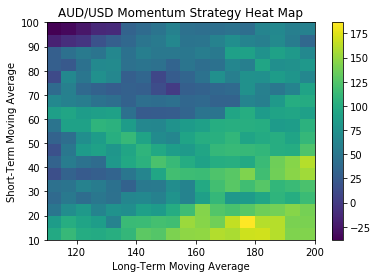

110     96.856118
115    112.514730
120     99.818717
125    107.390783
130    105.465734
135    113.970165
140    129.738804
145    126.373818
150    141.683584
155    152.769971
160    148.902616
165    160.417604
170    165.512429
175    186.376501
180    170.435484
185    161.366981
190    146.149337
195    161.541906
200    169.847599
dtype: float64
10     170.435484
15     186.376501
20     145.189042
25     120.220208
30     127.561944
35     169.847599
40     161.541906
45     128.854650
50     112.369436
55     107.390783
60     105.591532
65     100.729887
70      91.739130
75      96.684380
80     100.956898
85     103.666502
90      96.763326
95     104.410053
100    108.708909
dtype: float64


In [223]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXALUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/AUD Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

15/170 Strategy

count    12434.000000
mean         0.013311
std          0.690904
min        -13.575526
25%         -0.221284
50%         -0.000000
75%          0.256336
max         21.221675
Name: Strategy, dtype: float64

Skew: 2.6889
Kurtosis: 106.4675
Total Return = 165.51%
Annualized Return = 2.91%
Sharpe Ratio = 1.9300000000000002%


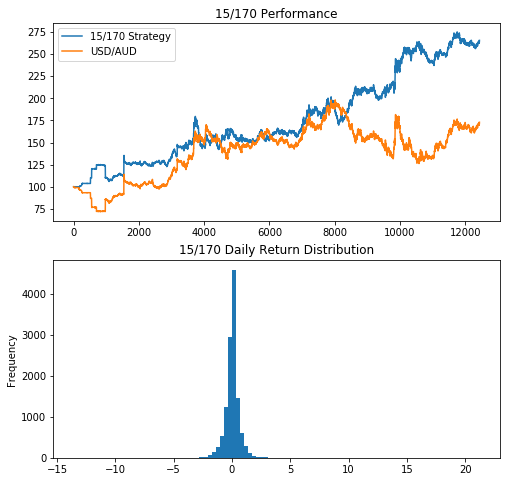

In [296]:
############################################################## 15/170 ##########################################################
usdaud['ShortMA'] = usdaud.VALUE.rolling(15).mean()
usdaud['LongMA'] = usdaud.VALUE.rolling(170).mean()

usdaud['Differential'] = usdaud['ShortMA'] - usdaud['LongMA']

X = 0
usdaud['Stance'] = np.where(usdaud['Differential'] > X, 1, 0)
usdaud['Stance'] = np.where(usdaud['Differential'] < X, -1, usdaud['Stance'])
usdaud['Stance'].value_counts()

usdaud['Returns'] = usdaud.VALUE.pct_change()[1:] * 100
usdaud['Strategy'] = usdaud['Returns'] * usdaud['Stance'].shift(1)

usdaud['StrategyPerformance'] = usdaud['Strategy'].cumsum() + 100

## Performance
print("15/170 Strategy" "\n")
print(usdaud['Strategy'].describe());
plt.subplot(2,1,1)
usdaud['StrategyPerformance'].plot(figsize = (8,8), label='15/170 Strategy');
plt.plot(usdaud['Returns'].cumsum() + 100, label='USD/AUD')
plt.legend();
plt.title("15/170 Performance");

## Distributions
plt.subplot(2,1,2)
usdaud['Strategy'].plot(kind='hist', figsize=(8,8), title='15/170 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdaud['Strategy'].skew(),4));
print("Kurtosis:",round(usdaud['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdaud['StrategyPerformance'][12434]) / usdaud['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdaud['StrategyPerformance'][12434]) / usdaud['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdaud['Strategy'].mean()/usdaud['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/NZD Analysis

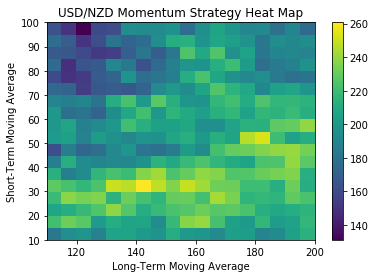

110    228.391637
115    238.027950
120    233.711606
125    235.939426
130    249.875722
135    246.957772
140    260.710785
145    247.657987
150    236.255105
155    249.494775
160    242.280647
165    243.158616
170    234.529378
175    246.449353
180    253.354573
185    238.950436
190    240.101876
195    238.993393
200    243.484783
dtype: float64
10     234.153826
15     240.198880
20     243.484783
25     243.158616
30     260.710785
35     242.321693
40     239.548273
45     240.101876
50     253.354573
55     238.993393
60     221.656227
65     226.838012
70     224.978504
75     223.639812
80     219.944493
85     224.969541
90     213.540374
95     206.929480
100    207.116421
dtype: float64


In [225]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXNZUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/NZD Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

30/140 Strategy

count    12434.000000
mean         0.020968
std          0.743771
min         -8.654849
25%         -0.234254
50%         -0.000000
75%          0.288723
max         22.854291
Name: Strategy, dtype: float64

Skew: 3.9421
Kurtosis: 112.477
Total Return = 260.71%
Annualized Return = 3.84%
Sharpe Ratio = 2.82%


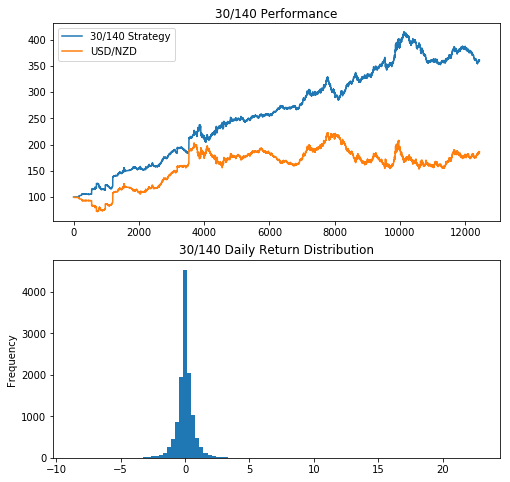

In [297]:
############################################################## 30/140 ##########################################################
usdnzd['ShortMA'] = usdnzd.VALUE.rolling(30).mean()
usdnzd['LongMA'] = usdnzd.VALUE.rolling(140).mean()

usdnzd['Differential'] = usdnzd['ShortMA'] - usdnzd['LongMA']

X = 0
usdnzd['Stance'] = np.where(usdnzd['Differential'] > X, 1, 0)
usdnzd['Stance'] = np.where(usdnzd['Differential'] < X, -1, usdnzd['Stance'])
usdnzd['Stance'].value_counts()

usdnzd['Returns'] = usdnzd.VALUE.pct_change()[1:] * 100
usdnzd['Strategy'] = usdnzd['Returns'] * usdnzd['Stance'].shift(1)

usdnzd['StrategyPerformance'] = usdnzd['Strategy'].cumsum() + 100

## Performance
print("30/140 Strategy" "\n")
print(usdnzd['Strategy'].describe());
plt.subplot(2,1,1)
usdnzd['StrategyPerformance'].plot(figsize = (8,8), label='30/140 Strategy');
plt.plot(usdnzd['Returns'].cumsum() + 100, label='USD/NZD')
plt.legend();
plt.title("30/140 Performance");

## Distributions
plt.subplot(2,1,2)
usdnzd['Strategy'].plot(kind='hist', figsize=(8,8), title='30/140 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdnzd['Strategy'].skew(),4));
print("Kurtosis:",round(usdnzd['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdnzd['StrategyPerformance'][12434]) / usdnzd['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdnzd['StrategyPerformance'][12434]) / usdnzd['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdnzd['Strategy'].mean()/usdnzd['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/SEK Analysis

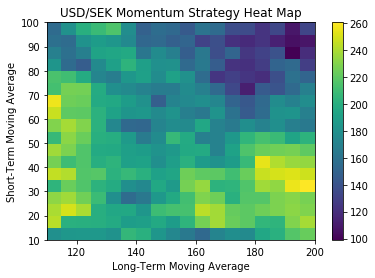

110    256.377793
115    250.150848
120    239.979824
125    217.721713
130    215.734823
135    206.934522
140    201.865917
145    209.949139
150    213.113164
155    226.796948
160    243.859922
165    238.263235
170    223.588949
175    223.327623
180    254.562460
185    249.902248
190    256.026302
195    260.526853
200    249.361818
dtype: float64
10     230.361037
15     243.267375
20     250.150848
25     249.361818
30     260.526853
35     251.784626
40     254.562460
45     237.290327
50     232.188997
55     238.995237
60     246.667056
65     256.377793
70     226.567251
75     214.045796
80     203.452971
85     196.562188
90     187.769505
95     215.734823
100    212.397739
dtype: float64


In [197]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXSDUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/SEK Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

30/195 Strategy

count    12434.000000
mean         0.020953
std          0.664665
min         -5.456841
25%         -0.271156
50%         -0.000000
75%          0.334359
max         16.269873
Name: Strategy, dtype: float64

Skew: 1.5967
Kurtosis: 41.9037
Total Return = 260.53000000000003%
Annualized Return = 3.84%
Sharpe Ratio = 3.15%


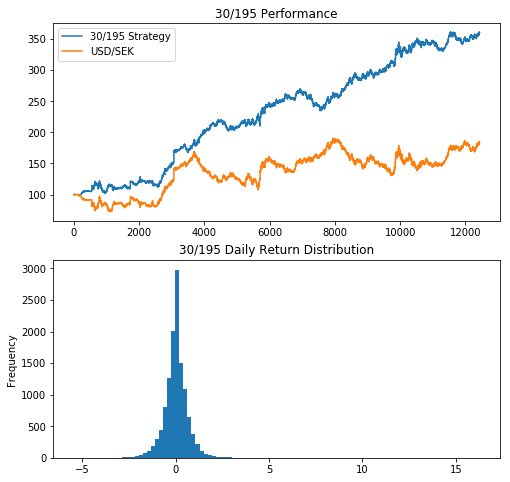

In [298]:
############################################################## 30/195 ##########################################################
usdsek['ShortMA'] = usdsek.VALUE.rolling(30).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(195).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)

usdsek['StrategyPerformance'] = usdsek['Strategy'].cumsum() + 100

## Performance
print("30/195 Strategy" "\n")
print(usdsek['Strategy'].describe());
plt.subplot(2,1,1)
usdsek['StrategyPerformance'].plot(figsize = (8,8), label='30/195 Strategy');
plt.plot(usdsek['Returns'].cumsum() + 100, label='USD/SEK')
plt.legend();
plt.title("30/195 Performance");

## Distributions
plt.subplot(2,1,2)
usdsek['Strategy'].plot(kind='hist', figsize=(8,8), title='30/195 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdsek['Strategy'].skew(),4));
print("Kurtosis:",round(usdsek['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdsek['StrategyPerformance'][12434]) / usdsek['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdsek['StrategyPerformance'][12434]) / usdsek['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdsek['Strategy'].mean()/usdsek['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# USD/NOK Analysis

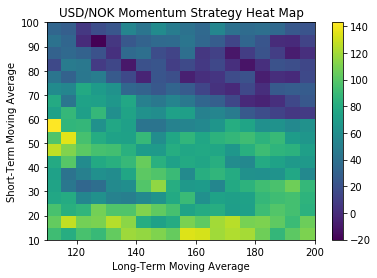

110    142.971442
115    135.897164
120    107.964936
125    109.893282
130    124.727364
135    118.771091
140    116.474203
145    116.031094
150    104.707531
155    134.213562
160    132.221548
165    120.471213
170    125.343059
175    121.140078
180    111.003452
185    102.812307
190    107.004244
195    110.552602
200    127.004054
dtype: float64
10     134.213562
15     128.209442
20     112.373800
25      99.229216
30     116.031094
35     101.897747
40     105.267196
45     127.052085
50     135.897164
55     142.971442
60      88.541176
65      79.143699
70      78.037798
75      48.569636
80      47.295801
85      38.748324
90      43.483972
95      58.161922
100     71.897520
dtype: float64


In [199]:
for i, sma in enumerate(ShortMA):
    for j, lma in enumerate(LongMA):
        pnl = MAstrat('DEXNOUS',sma,lma)
        results_pnl[i,j] = pnl
 
plt.title("USD/NOK Momentum Strategy Heat Map")
plt.ylabel("Short-Term Moving Average")
plt.xlabel("Long-Term Moving Average")
plt.pcolormesh(LongMA,ShortMA,results_pnl)
plt.colorbar()
plt.show()

XRdf = pd.DataFrame(results_pnl, index=[ShortMA], columns=[LongMA])
print(XRdf.max(0))
print(XRdf.max(1))

55/110 Strategy

count    12434.000000
mean         0.011498
std          0.653557
min         -7.055436
25%         -0.290919
50%          0.000000
75%          0.321258
max          6.240718
Name: Strategy, dtype: float64

Skew: -0.1057
Kurtosis: 7.6757
Total Return = 142.97%
Annualized Return = 2.64%
Sharpe Ratio = 1.76%


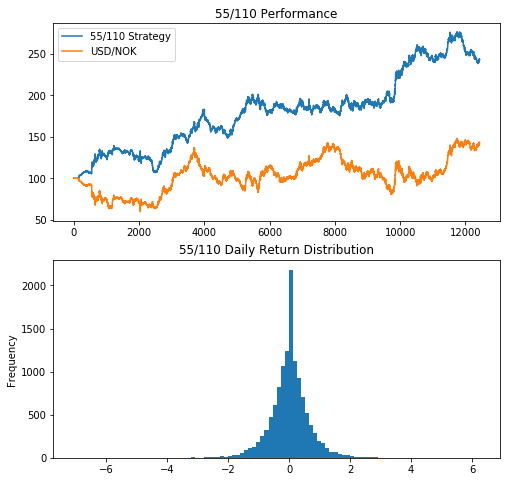

In [299]:
############################################################## 55/110 ##########################################################
usdnok['ShortMA'] = usdnok.VALUE.rolling(55).mean()
usdnok['LongMA'] = usdnok.VALUE.rolling(110).mean()

usdnok['Differential'] = usdnok['ShortMA'] - usdnok['LongMA']

X = 0
usdnok['Stance'] = np.where(usdnok['Differential'] > X, 1, 0)
usdnok['Stance'] = np.where(usdnok['Differential'] < X, -1, usdnok['Stance'])
usdnok['Stance'].value_counts()

usdnok['Returns'] = usdnok.VALUE.pct_change()[1:] * 100
usdnok['Strategy'] = usdnok['Returns'] * usdnok['Stance'].shift(1)

usdnok['StrategyPerformance'] = usdnok['Strategy'].cumsum() + 100

## Performance
print("55/110 Strategy" "\n")
print(usdnok['Strategy'].describe());
plt.subplot(2,1,1)
usdnok['StrategyPerformance'].plot(figsize = (8,8), label='55/110 Strategy');
plt.plot(usdnok['Returns'].cumsum() + 100, label='USD/NOK')
plt.legend();
plt.title("55/110 Performance");

## Distributions
plt.subplot(2,1,2)
usdnok['Strategy'].plot(kind='hist', figsize=(8,8), title='55/110 Daily Return Distribution', bins=100);

print("\n" "Skew:",round(usdnok['Strategy'].skew(),4));
print("Kurtosis:",round(usdnok['Strategy'].kurt(),4));

#1) Annualised Return
totr = (((usdnok['StrategyPerformance'][12434]) / usdnok['StrategyPerformance'][1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((usdnok['StrategyPerformance'][12434]) / usdnok['StrategyPerformance'][1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = usdnok['Strategy'].mean()/usdnok['Strategy'].std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

# Optimum Strategy (Equally-Weighted)

Equally-Weighted Basket Strategy

count    12434.000000
mean         0.016767
std          0.396833
min         -4.484640
25%         -0.136310
50%          0.003248
75%          0.178088
max          5.090635
Name: Strategy, dtype: float64

Skew: 0.1795
Kurtosis: 13.2293
Total Return = 208.48%
Annualized Return = 3.36%
Sharpe Ratio = 4.2299999999999995%

std          0.586635 gbp
std          0.631865 jpy
std          0.707298 chf
std          0.401546 cad
std          1.036356 aud
std          0.743771 nzd
std          0.664665 sek
std          0.653557 nok

The Standard-Deviation of 0.396833 of the Equally-Weighted Basket Strategy is lower than each currency

sharpe          2.423% gbp
sharpe          3.64% jpy
sharpe          1.98% chf
sharpe          2.37% cad
sharpe          1.93% aud
sharpe          2.82% nzd
sharpe          3.15% sek
sharpe          1.76% nok

This strategy offers a Sharpe Ratio of 4.23%, beating each individual currency


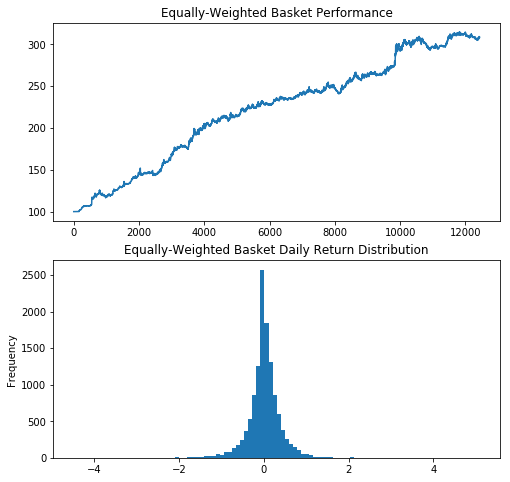

In [301]:
usdgbp['ShortMA'] = usdgbp.VALUE.rolling(10).mean()
usdgbp['LongMA'] = usdgbp.VALUE.rolling(195).mean()

usdgbp['Differential'] = usdgbp['ShortMA'] - usdgbp['LongMA']

X = 0
usdgbp['Stance'] = np.where(usdgbp['Differential'] > X, 1, 0)
usdgbp['Stance'] = np.where(usdgbp['Differential'] < X, -1, usdgbp['Stance'])
usdgbp['Stance'].value_counts()

usdgbp['Returns'] = usdgbp.VALUE.pct_change()[1:] * 100
usdgbp['Strategy'] = usdgbp['Returns'] * usdgbp['Stance'].shift(1)



usdjpy['ShortMA'] = usdjpy.VALUE.rolling(10).mean()
usdjpy['LongMA'] = usdjpy.VALUE.rolling(115).mean()

usdjpy['Differential'] = usdjpy['ShortMA'] - usdjpy['LongMA']

X = 0
usdjpy['Stance'] = np.where(usdjpy['Differential'] > X, 1, 0)
usdjpy['Stance'] = np.where(usdjpy['Differential'] < X, -1, usdjpy['Stance'])
usdjpy['Stance'].value_counts()

usdjpy['Returns'] = usdjpy.VALUE.pct_change()[1:] * 100
usdjpy['Strategy'] = usdjpy['Returns'] * usdjpy['Stance'].shift(1)



usdchf['ShortMA'] = usdchf.VALUE.rolling(10).mean()
usdchf['LongMA'] = usdchf.VALUE.rolling(140).mean()

usdchf['Differential'] = usdchf['ShortMA'] - usdchf['LongMA']

X = 0
usdchf['Stance'] = np.where(usdchf['Differential'] > X, 1, 0)
usdchf['Stance'] = np.where(usdchf['Differential'] < X, -1, usdchf['Stance'])
usdchf['Stance'].value_counts()

usdchf['Returns'] = usdchf.VALUE.pct_change()[1:] * 100
usdchf['Strategy'] = usdchf['Returns'] * usdchf['Stance'].shift(1)



usdcad['ShortMA'] = usdcad.VALUE.rolling(30).mean()
usdcad['LongMA'] = usdcad.VALUE.rolling(165).mean()

usdcad['Differential'] = usdcad['ShortMA'] - usdcad['LongMA']

X = 0
usdcad['Stance'] = np.where(usdcad['Differential'] > X, 1, 0)
usdcad['Stance'] = np.where(usdcad['Differential'] < X, -1, usdcad['Stance'])
usdcad['Stance'].value_counts()

usdcad['Returns'] = usdcad.VALUE.pct_change()[1:] * 100
usdcad['Strategy'] = usdcad['Returns'] * usdcad['Stance'].shift(1)



usdaud['ShortMA'] = usdaud.VALUE.rolling(15).mean()
usdaud['LongMA'] = usdaud.VALUE.rolling(170).mean()

usdaud['Differential'] = usdaud['ShortMA'] - usdaud['LongMA']

X = 0
usdaud['Stance'] = np.where(usdaud['Differential'] > X, 1, 0)
usdaud['Stance'] = np.where(usdaud['Differential'] < X, -1, usdaud['Stance'])
usdaud['Stance'].value_counts()

usdaud['Returns'] = usdaud.VALUE.pct_change()[1:] * 150
usdaud['Strategy'] = usdaud['Returns'] * usdaud['Stance'].shift(1)


usdnzd['ShortMA'] = usdnzd.VALUE.rolling(30).mean()
usdnzd['LongMA'] = usdnzd.VALUE.rolling(140).mean()

usdnzd['Differential'] = usdnzd['ShortMA'] - usdnzd['LongMA']

X = 0
usdnzd['Stance'] = np.where(usdnzd['Differential'] > X, 1, 0)
usdnzd['Stance'] = np.where(usdnzd['Differential'] < X, -1, usdnzd['Stance'])
usdnzd['Stance'].value_counts()

usdnzd['Returns'] = usdnzd.VALUE.pct_change()[1:] * 100
usdnzd['Strategy'] = usdnzd['Returns'] * usdnzd['Stance'].shift(1)


usdsek['ShortMA'] = usdsek.VALUE.rolling(30).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(195).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)



usdnok['ShortMA'] = usdnok.VALUE.rolling(55).mean()
usdnok['LongMA'] = usdnok.VALUE.rolling(110).mean()

usdnok['Differential'] = usdnok['ShortMA'] - usdnok['LongMA']

X = 0
usdnok['Stance'] = np.where(usdnok['Differential'] > X, 1, 0)
usdnok['Stance'] = np.where(usdnok['Differential'] < X, -1, usdnok['Stance'])
usdnok['Stance'].value_counts()

usdnok['Returns'] = usdnok.VALUE.pct_change()[1:] * 100
usdnok['Strategy'] = usdnok['Returns'] * usdnok['Stance'].shift(1)



basket_EQStrategy = (usdgbp['Strategy'] + usdjpy['Strategy'] + usdchf['Strategy'] + usdcad['Strategy'] + usdaud['Strategy']
                     + usdnzd['Strategy'] + usdsek['Strategy'] + usdnok['Strategy']) / 8

basket_EQStrategyPerformance= basket_EQStrategy.cumsum() + 100

basket_EQReturns = (usdgbp['Returns'] + usdjpy['Returns'] + usdchf['Returns'] + usdcad['Returns'] + usdaud['Returns']
                     + usdnzd['Returns'] + usdsek['Returns'] + usdnok['Returns']) / 8

basket_EQReturnsPerformance= basket_EQReturns.cumsum() + 100

print("Equally-Weighted Basket Strategy" "\n")
print(basket_EQStrategy.describe());
plt.subplot(2,1,1)
basket_EQStrategyPerformance.plot(figsize = (8,8));
plt.title("Equally-Weighted Basket Performance");

## Distributions
plt.subplot(2,1,2)
basket_EQStrategy.plot(kind='hist', figsize=(8,8), title='Equally-Weighted Basket Daily Return Distribution', bins=100);

print("\n" "Skew:",round(basket_EQStrategy.skew(),4));
print("Kurtosis:",round(basket_EQStrategy.kurt(),4));

#1) Annualised Return
totr = (((basket_EQStrategyPerformance[12434]) / basket_EQStrategyPerformance[1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((basket_EQStrategyPerformance[12434]) / basket_EQStrategyPerformance[1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = basket_EQStrategy.mean()/basket_EQStrategy.std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")


print ("\n" "std          0.586635 gbp" "\n"
       "std          0.631865 jpy" "\n"
       "std          0.707298 chf" "\n"
       "std          0.401546 cad" "\n"
       "std          1.036356 aud" "\n"
       "std          0.743771 nzd" "\n"
       "std          0.664665 sek" "\n"
       "std          0.653557 nok")
print ("\n" "The Standard-Deviation of 0.396833 of the Equally-Weighted Basket Strategy is lower than each currency")


print ("\n" "sharpe          2.423% gbp" "\n"
       "sharpe          3.64% jpy" "\n"
       "sharpe          1.98% chf" "\n"
       "sharpe          2.37% cad" "\n"
       "sharpe          1.93% aud" "\n"
       "sharpe          2.82% nzd" "\n"
       "sharpe          3.15% sek" "\n"
       "sharpe          1.76% nok")
print ("\n" "This strategy offers a Sharpe Ratio of 4.23%, beating each individual currency")

# Optimum Strategy (Volatility-Weighted)

Volatility-Adjusted Basket Strategy

This strategy weights each currency in the portfolio according to the volatility it displays,
i.e. higher volatility = higher weight

count    12434.000000
mean         0.017387
std          0.433275
min         -4.835971
25%         -0.150169
50%          0.004122
75%          0.191441
max          7.180447
Name: Strategy, dtype: float64

Skew: 0.5217
Kurtosis: 18.6198
Total Return = 216.19000000000003%
Annualized Return = 3.44%
Sharpe Ratio = 4.01%

sharpe          2.423% gbp
sharpe          3.64% jpy
sharpe          1.98% chf
sharpe          2.37% cad
sharpe          1.93% aud
sharpe          2.82% nzd
sharpe          3.15% sek
sharpe          1.76% nok

This strategy offers a Sharpe Ratio of 4.01%, beating each individual currency, but losing to the equally-weighted strategy


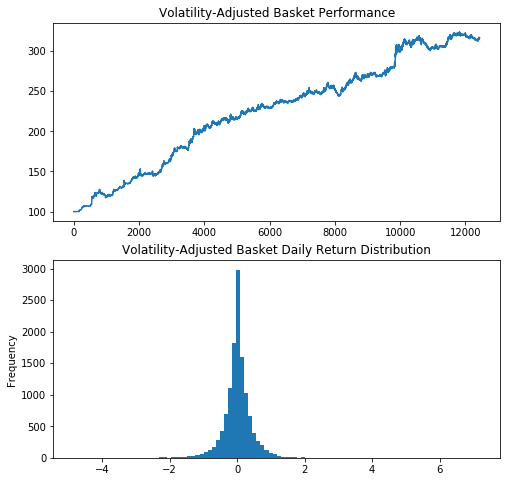

In [260]:
usdgbp['ShortMA'] = usdgbp.VALUE.rolling(10).mean()
usdgbp['LongMA'] = usdgbp.VALUE.rolling(195).mean()

usdgbp['Differential'] = usdgbp['ShortMA'] - usdgbp['LongMA']

X = 0
usdgbp['Stance'] = np.where(usdgbp['Differential'] > X, 1, 0)
usdgbp['Stance'] = np.where(usdgbp['Differential'] < X, -1, usdgbp['Stance'])
usdgbp['Stance'].value_counts()

usdgbp['Returns'] = usdgbp.VALUE.pct_change()[1:] * 100
usdgbp['Strategy'] = usdgbp['Returns'] * usdgbp['Stance'].shift(1)



usdjpy['ShortMA'] = usdjpy.VALUE.rolling(10).mean()
usdjpy['LongMA'] = usdjpy.VALUE.rolling(115).mean()

usdjpy['Differential'] = usdjpy['ShortMA'] - usdjpy['LongMA']

X = 0
usdjpy['Stance'] = np.where(usdjpy['Differential'] > X, 1, 0)
usdjpy['Stance'] = np.where(usdjpy['Differential'] < X, -1, usdjpy['Stance'])
usdjpy['Stance'].value_counts()

usdjpy['Returns'] = usdjpy.VALUE.pct_change()[1:] * 100
usdjpy['Strategy'] = usdjpy['Returns'] * usdjpy['Stance'].shift(1)



usdchf['ShortMA'] = usdchf.VALUE.rolling(10).mean()
usdchf['LongMA'] = usdchf.VALUE.rolling(140).mean()

usdchf['Differential'] = usdchf['ShortMA'] - usdchf['LongMA']

X = 0
usdchf['Stance'] = np.where(usdchf['Differential'] > X, 1, 0)
usdchf['Stance'] = np.where(usdchf['Differential'] < X, -1, usdchf['Stance'])
usdchf['Stance'].value_counts()

usdchf['Returns'] = usdchf.VALUE.pct_change()[1:] * 100
usdchf['Strategy'] = usdchf['Returns'] * usdchf['Stance'].shift(1)



usdcad['ShortMA'] = usdcad.VALUE.rolling(30).mean()
usdcad['LongMA'] = usdcad.VALUE.rolling(165).mean()

usdcad['Differential'] = usdcad['ShortMA'] - usdcad['LongMA']

X = 0
usdcad['Stance'] = np.where(usdcad['Differential'] > X, 1, 0)
usdcad['Stance'] = np.where(usdcad['Differential'] < X, -1, usdcad['Stance'])
usdcad['Stance'].value_counts()

usdcad['Returns'] = usdcad.VALUE.pct_change()[1:] * 100
usdcad['Strategy'] = usdcad['Returns'] * usdcad['Stance'].shift(1)



usdaud['ShortMA'] = usdaud.VALUE.rolling(15).mean()
usdaud['LongMA'] = usdaud.VALUE.rolling(170).mean()

usdaud['Differential'] = usdaud['ShortMA'] - usdaud['LongMA']

X = 0
usdaud['Stance'] = np.where(usdaud['Differential'] > X, 1, 0)
usdaud['Stance'] = np.where(usdaud['Differential'] < X, -1, usdaud['Stance'])
usdaud['Stance'].value_counts()

usdaud['Returns'] = usdaud.VALUE.pct_change()[1:] * 150
usdaud['Strategy'] = usdaud['Returns'] * usdaud['Stance'].shift(1)


usdnzd['ShortMA'] = usdnzd.VALUE.rolling(30).mean()
usdnzd['LongMA'] = usdnzd.VALUE.rolling(140).mean()

usdnzd['Differential'] = usdnzd['ShortMA'] - usdnzd['LongMA']

X = 0
usdnzd['Stance'] = np.where(usdnzd['Differential'] > X, 1, 0)
usdnzd['Stance'] = np.where(usdnzd['Differential'] < X, -1, usdnzd['Stance'])
usdnzd['Stance'].value_counts()

usdnzd['Returns'] = usdnzd.VALUE.pct_change()[1:] * 100
usdnzd['Strategy'] = usdnzd['Returns'] * usdnzd['Stance'].shift(1)


usdsek['ShortMA'] = usdsek.VALUE.rolling(30).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(195).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)



usdnok['ShortMA'] = usdnok.VALUE.rolling(55).mean()
usdnok['LongMA'] = usdnok.VALUE.rolling(110).mean()

usdnok['Differential'] = usdnok['ShortMA'] - usdnok['LongMA']

X = 0
usdnok['Stance'] = np.where(usdnok['Differential'] > X, 1, 0)
usdnok['Stance'] = np.where(usdnok['Differential'] < X, -1, usdnok['Stance'])
usdnok['Stance'].value_counts()

usdnok['Returns'] = usdnok.VALUE.pct_change()[1:] * 100
usdnok['Strategy'] = usdnok['Returns'] * usdnok['Stance'].shift(1)

gbpstd = 0.586635
jpystd = 0.631865
chfstd = 0.707298
cadstd = 0.401546
audstd = 1.036356
nzdstd = 0.743771
sekstd = 0.664665
nokstd = 0.653557
totalstd = (gbpstd + jpystd + chfstd + cadstd + audstd + nzdstd + sekstd + nokstd)

basket_AdjStrategy = ((usdgbp['Strategy']*(gbpstd/totalstd)) + (usdjpy['Strategy']*(jpystd/totalstd)) 
                     + (usdchf['Strategy']*(chfstd/totalstd)) + (usdcad['Strategy']*(cadstd/totalstd)) 
                     + (usdaud['Strategy']*(audstd/totalstd)) + (usdnzd['Strategy']*(nzdstd/totalstd)) 
                     + (usdsek['Strategy']*(sekstd/totalstd)) + (usdnok['Strategy']*(nokstd/totalstd)))

basket_AdjStrategyPerformance= basket_AdjStrategy.cumsum() + 100

print("Volatility-Adjusted Basket Strategy" "\n")
print("This strategy weights each currency in the portfolio according to the volatility it displays,")
print("i.e. higher volatility = higher weight" "\n")
print(basket_AdjStrategy.describe());
plt.subplot(2,1,1)
basket_AdjStrategyPerformance.plot(figsize = (8,8));
plt.title("Volatility-Adjusted Basket Performance");

## Distributions
plt.subplot(2,1,2)
basket_AdjStrategy.plot(kind='hist', figsize=(8,8), title='Volatility-Adjusted Basket Daily Return Distribution', bins=100);

print("\n" "Skew:",round(basket_AdjStrategy.skew(),4));
print("Kurtosis:",round(basket_AdjStrategy.kurt(),4));

#1) Annualised Return
totr = (((basket_AdjStrategyPerformance[12434]) / basket_AdjStrategyPerformance[1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((basket_AdjStrategyPerformance[12434]) / basket_AdjStrategyPerformance[1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = basket_AdjStrategy.mean()/basket_AdjStrategy.std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

print ("\n" "sharpe          2.423% gbp" "\n"
       "sharpe          3.64% jpy" "\n"
       "sharpe          1.98% chf" "\n"
       "sharpe          2.37% cad" "\n"
       "sharpe          1.93% aud" "\n"
       "sharpe          2.82% nzd" "\n"
       "sharpe          3.15% sek" "\n"
       "sharpe          1.76% nok")
print ("\n" "This strategy offers a Sharpe Ratio of 4.01%, beating each individual currency, but losing to the equally-weighted strategy")

# Optimum Strategy (Inverse-Volatility-Adjusted)

Volatility-Adjusted Basket Strategy

This strategy weights each currency in the portfolio according to the volatility it displays,
i.e. higher volatility = lower weight

count    12434.000000
mean         0.016013
std          0.368040
min         -4.279102
25%         -0.129666
50%          0.003869
75%          0.166672
max          3.792559
Name: Strategy, dtype: float64

Skew: -0.014
Kurtosis: 11.2902
Total Return = 199.10000000000002%
Annualized Return = 3.27%
Sharpe Ratio = 4.35%

sharpe          2.423% gbp
sharpe          3.64% jpy
sharpe          1.98% chf
sharpe          2.37% cad
sharpe          1.93% aud
sharpe          2.82% nzd
sharpe          3.15% sek
sharpe          1.76% nok

This strategy offers a Sharpe Ratio of 4.35%, beating each individual currency, and each portfolio strategy
This shows that the higher volatility currencies display larger (and more likely) drawdowns


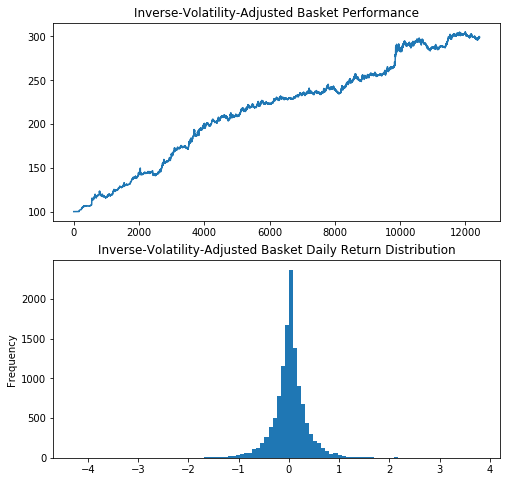

In [262]:
usdgbp['ShortMA'] = usdgbp.VALUE.rolling(10).mean()
usdgbp['LongMA'] = usdgbp.VALUE.rolling(195).mean()

usdgbp['Differential'] = usdgbp['ShortMA'] - usdgbp['LongMA']

X = 0
usdgbp['Stance'] = np.where(usdgbp['Differential'] > X, 1, 0)
usdgbp['Stance'] = np.where(usdgbp['Differential'] < X, -1, usdgbp['Stance'])
usdgbp['Stance'].value_counts()

usdgbp['Returns'] = usdgbp.VALUE.pct_change()[1:] * 100
usdgbp['Strategy'] = usdgbp['Returns'] * usdgbp['Stance'].shift(1)



usdjpy['ShortMA'] = usdjpy.VALUE.rolling(10).mean()
usdjpy['LongMA'] = usdjpy.VALUE.rolling(115).mean()

usdjpy['Differential'] = usdjpy['ShortMA'] - usdjpy['LongMA']

X = 0
usdjpy['Stance'] = np.where(usdjpy['Differential'] > X, 1, 0)
usdjpy['Stance'] = np.where(usdjpy['Differential'] < X, -1, usdjpy['Stance'])
usdjpy['Stance'].value_counts()

usdjpy['Returns'] = usdjpy.VALUE.pct_change()[1:] * 100
usdjpy['Strategy'] = usdjpy['Returns'] * usdjpy['Stance'].shift(1)



usdchf['ShortMA'] = usdchf.VALUE.rolling(10).mean()
usdchf['LongMA'] = usdchf.VALUE.rolling(140).mean()

usdchf['Differential'] = usdchf['ShortMA'] - usdchf['LongMA']

X = 0
usdchf['Stance'] = np.where(usdchf['Differential'] > X, 1, 0)
usdchf['Stance'] = np.where(usdchf['Differential'] < X, -1, usdchf['Stance'])
usdchf['Stance'].value_counts()

usdchf['Returns'] = usdchf.VALUE.pct_change()[1:] * 100
usdchf['Strategy'] = usdchf['Returns'] * usdchf['Stance'].shift(1)



usdcad['ShortMA'] = usdcad.VALUE.rolling(30).mean()
usdcad['LongMA'] = usdcad.VALUE.rolling(165).mean()

usdcad['Differential'] = usdcad['ShortMA'] - usdcad['LongMA']

X = 0
usdcad['Stance'] = np.where(usdcad['Differential'] > X, 1, 0)
usdcad['Stance'] = np.where(usdcad['Differential'] < X, -1, usdcad['Stance'])
usdcad['Stance'].value_counts()

usdcad['Returns'] = usdcad.VALUE.pct_change()[1:] * 100
usdcad['Strategy'] = usdcad['Returns'] * usdcad['Stance'].shift(1)



usdaud['ShortMA'] = usdaud.VALUE.rolling(15).mean()
usdaud['LongMA'] = usdaud.VALUE.rolling(170).mean()

usdaud['Differential'] = usdaud['ShortMA'] - usdaud['LongMA']

X = 0
usdaud['Stance'] = np.where(usdaud['Differential'] > X, 1, 0)
usdaud['Stance'] = np.where(usdaud['Differential'] < X, -1, usdaud['Stance'])
usdaud['Stance'].value_counts()

usdaud['Returns'] = usdaud.VALUE.pct_change()[1:] * 150
usdaud['Strategy'] = usdaud['Returns'] * usdaud['Stance'].shift(1)


usdnzd['ShortMA'] = usdnzd.VALUE.rolling(30).mean()
usdnzd['LongMA'] = usdnzd.VALUE.rolling(140).mean()

usdnzd['Differential'] = usdnzd['ShortMA'] - usdnzd['LongMA']

X = 0
usdnzd['Stance'] = np.where(usdnzd['Differential'] > X, 1, 0)
usdnzd['Stance'] = np.where(usdnzd['Differential'] < X, -1, usdnzd['Stance'])
usdnzd['Stance'].value_counts()

usdnzd['Returns'] = usdnzd.VALUE.pct_change()[1:] * 100
usdnzd['Strategy'] = usdnzd['Returns'] * usdnzd['Stance'].shift(1)


usdsek['ShortMA'] = usdsek.VALUE.rolling(30).mean()
usdsek['LongMA'] = usdsek.VALUE.rolling(195).mean()

usdsek['Differential'] = usdsek['ShortMA'] - usdsek['LongMA']

X = 0
usdsek['Stance'] = np.where(usdsek['Differential'] > X, 1, 0)
usdsek['Stance'] = np.where(usdsek['Differential'] < X, -1, usdsek['Stance'])
usdsek['Stance'].value_counts()

usdsek['Returns'] = usdsek.VALUE.pct_change()[1:] * 100
usdsek['Strategy'] = usdsek['Returns'] * usdsek['Stance'].shift(1)



usdnok['ShortMA'] = usdnok.VALUE.rolling(55).mean()
usdnok['LongMA'] = usdnok.VALUE.rolling(110).mean()

usdnok['Differential'] = usdnok['ShortMA'] - usdnok['LongMA']

X = 0
usdnok['Stance'] = np.where(usdnok['Differential'] > X, 1, 0)
usdnok['Stance'] = np.where(usdnok['Differential'] < X, -1, usdnok['Stance'])
usdnok['Stance'].value_counts()

usdnok['Returns'] = usdnok.VALUE.pct_change()[1:] * 100
usdnok['Strategy'] = usdnok['Returns'] * usdnok['Stance'].shift(1)

gbpstd = 1/0.586635
jpystd = 1/0.631865
chfstd = 1/0.707298
cadstd = 1/0.401546
audstd = 1/1.036356
nzdstd = 1/0.743771
sekstd = 1/0.664665
nokstd = 1/0.653557
totalstd = (gbpstd + jpystd + chfstd + cadstd + audstd + nzdstd + sekstd + nokstd)

basket_InvAdjStrategy = ((usdgbp['Strategy']*(gbpstd/totalstd)) + (usdjpy['Strategy']*(jpystd/totalstd)) 
                     + (usdchf['Strategy']*(chfstd/totalstd)) + (usdcad['Strategy']*(cadstd/totalstd)) 
                     + (usdaud['Strategy']*(audstd/totalstd)) + (usdnzd['Strategy']*(nzdstd/totalstd)) 
                     + (usdsek['Strategy']*(sekstd/totalstd)) + (usdnok['Strategy']*(nokstd/totalstd)))

basket_InvAdjStrategyPerformance= basket_InvAdjStrategy.cumsum() + 100

print("Volatility-Adjusted Basket Strategy" "\n")
print("This strategy weights each currency in the portfolio according to the volatility it displays,")
print("i.e. higher volatility = lower weight" "\n")
print(basket_InvAdjStrategy.describe());
plt.subplot(2,1,1)
basket_InvAdjStrategyPerformance.plot(figsize = (8,8));
plt.title("Inverse-Volatility-Adjusted Basket Performance");

## Distributions
plt.subplot(2,1,2)
basket_InvAdjStrategy.plot(kind='hist', figsize=(8,8), title='Inverse-Volatility-Adjusted Basket Daily Return Distribution', bins=100);

print("\n" "Skew:",round(basket_InvAdjStrategy.skew(),4));
print("Kurtosis:",round(basket_InvAdjStrategy.kurt(),4));

#1) Annualised Return
totr = (((basket_InvAdjStrategyPerformance[12434]) / basket_InvAdjStrategyPerformance[1])) - 1
print ('Total Return =',str(round(totr,4)*100)+"%")
cagr = ((((basket_InvAdjStrategyPerformance[12434]) / basket_InvAdjStrategyPerformance[1])) ** (365.0/12434)) - 1
print ('Annualized Return =',str(round(cagr,4)*100)+"%")
shrp = basket_InvAdjStrategy.mean()/basket_InvAdjStrategy.std()
print('Sharpe Ratio =',str(round(shrp,4)*100)+"%")

print ("\n" "sharpe          2.423% gbp" "\n"
       "sharpe          3.64% jpy" "\n"
       "sharpe          1.98% chf" "\n"
       "sharpe          2.37% cad" "\n"
       "sharpe          1.93% aud" "\n"
       "sharpe          2.82% nzd" "\n"
       "sharpe          3.15% sek" "\n"
       "sharpe          1.76% nok")
print ("\n" "This strategy offers a Sharpe Ratio of 4.35%, beating each individual currency, and each portfolio strategy")
print ("This shows that the higher volatility currencies display larger (and more likely) drawdowns")